## Mount Drive and Libraries 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install kmodes
!pip install xgboost
!pip install lightgbm
!pip install mlxtend
!pip install Boruta
!pip install catboost
!pip install lightgbm
%pip install mlxtend --upgrade
#################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
from kmodes.kmodes import KModes
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.datasets import make_blobs
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer
import copy
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocessing and Feature Selection

Target Variable
1 = 1,319 AD patients
2 = 1,555 control
3 = other
4 = 792 MCI.

In [3]:
def preprocessing(data):
  """
  This function drops columns with more than 60% NAs or no relation to alzheimers.
  Input: raw dataframe
  Output: cleaned dataframe
  """
  #Only retain the data where the patients' samples are analysed with RBM 
  df_with_RBM = data[data['RBM_Rule_Based_Medicine']==1]

  #Drop columns which are not "biomarkers"
  df_biomarkers = df_with_RBM.drop(['STUDYID','PATID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX','CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN',
 'CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
 'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX',
 'A1_MARISTAT','A1_RACE','A1_RACESEC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV',
 'A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR','A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP',
 'A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR','A41_PMBSU',
 'A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA',
 'A43_ADAENDMO','A43_ADAENDYR','A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR',
 'A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO','A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT',
 'A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA','A43_ADCENDMO','A43_ADCENDYR',
 'A43_ADCF', 'A43_ADCFU', 'A43_ADCPREV', 'A43_ADCRT', 'A43_ADCS', 'A43_ADCSTDA', 'A43_ADCSTMO',
 'A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT','A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT',
 'A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT','A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR',
 'A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF','A43_ADFCONT',
 'A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR',
 'A43_ADFSU','A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA',
 'A44_SSASTMO','A44_SSASTYR','A44_SSASU','A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO',
 'A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU','A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR',
 'A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT','A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU',
 'A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO','A44_SSESTYR','A44_SSESU','A44_SSF',
 'A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU','A5_ABUSOTHR','A5_ABUSX',
 'A5_ALCOHOL','A5_ARTHRITIC','A5_AUTOIMM','A5_B12DEF','A5_CANCER','A5_CBOTHR','A5_CBOTHRX','A5_CBSTROKE','A5_CBTIA','A5_CHRON_OTH','A5_CHRON_OTHX',
 'A5_CVAFIB', 'A5_CVANGIO','A5_CVBYPASS','A5_CVCHF','A5_CVHATT','A5_CVOTHR','A5_CVOTHRX','A5_CVPACE','A5_DEP2YRS','A5_DEPOTHR','A5_DIABETES',
 'A5_HYPERCHO','A5_HYPERTEN','A5_IBD','A5_INCONTF','A5_INCONTU','A5_NCOTHR','A5_NCOTHRX','A5_PACKSPER','A5_PD','A5_PDOTHR','A5_PDOTHRYR',
 'A5_PDYR','A5_PSYCDIS','A5_PSYCDISX','A5_QUITSMOK','A5_SEIZURES','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR',
 'A5_STROK5YR','A5_STROK6YR','A5_THYROID','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30',
 'A5_TOBACLSTYR','A5_TRAUMBRF','A5_TRAUMCHR','A5_TRAUMEXT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
 'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DEL','B5_DELSEV','B5_HALL','B5_HALLSEV','B5_AGIT','B5_AGITSEV','B5_DEPD','B5_DEPDSEV',
 'B5_ANX','B5_ANXSEV','B5_ELAT','B5_ELATSEV','B5_APA','B5_APASEV','B5_DISN','B5_DISNSEV','B5_IRR','B5_IRRSEV','B5_MOT','B5_MOTSEV','B5_NITE',
 'B5_NITESEV','B5_APP','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
 'C1_CDROR','C1_CDRPER','C1_CDRSUM', 'C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT', 'C1_CERAD_WR_DISCRIM',
 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES', 'C1_CLOCK', 'C1_CLOX1', 'C1_CLOX2', 'C1_FAS_A', 'C1_FAS_F', 'C1_FAS_S', 'C1_GDS15', 'C1_GDS30', 'C1_LITPROB',
 'C1_MMSE', 'C1_SS_AMNART', 'C1_SS_BOSTON60', 'C1_SS_COMBINED_DIGTOT', 'C1_SS_COMBINED_LM_I', 'C1_SS_COMBINED_LM_II', 'C1_SS_COMBINED_VR_I',
 'C1_SS_COMBINED_VR_II', 'C1_SS_COWAT', 'C1_SS_TRAILA', 'C1_SS_TRAILB', 'C1_SS_WAIS3_DIGTOT', 'C1_SS_WAISR_DIGTOT', 'C1_SS_WMS3_LM_I',
 'C1_SS_WMS3_LM_II', 'C1_SS_WMS3_VR_I', 'C1_SS_WMS3_VR_II', 'C1_SS_WMSR_DIGTOT', 'C1_SS_WMSR_LM_I', 'C1_SS_WMSR_LM_II','C1_SS_WMSR_VR_I',
 'C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA', 'C1_TRAILAERR', 'C1_TRAILB',
 'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF',
 'C1_WAISR_DIGILB','C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1',
 'C1_WMS3_STORY1B2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B','C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E',
 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E', 'C1_WMS3_VRI', 'C1_WMS3_VRII', 'C1_WMSR_DIGIB',
 'C1_WMSR_DIGIF', 'C1_WMSR_DIGILB', 'C1_WMSR_DIGILF', 'C1_WMSR_DIGTOT', 'C1_WMSR_LMEM1', 'C1_WMSR_LMEM2', 'C1_WMSR_STORY1A', 'C1_WMSR_STORY1B1',
 'C1_WMSR_STORY2A', 'C1_WMSR_STORY2B', 'C1_WMSR_VR_A', 'C1_WMSR_VR_B', 'C1_WMSR_VR_C', 'C1_WMSR_VR_D', 'C1_WMSR_VR2_A', 'C1_WMSR_VR2_B',
 'C1_WMSR_VR2_C', 'C1_WMSR_VR2_D', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'D1_ALCDEM', 'D1_ALCDEMIF', 'D1_BRNINJ', 'D1_BRNINJIF', 'D1_COGOTH', 'D1_COGOTHIF',
 'D1_COGOTHX', 'D1_CORT', 'D1_CORTIF', 'D1_DEMENTED', 'D1_DEMUN', 'D1_DEMUNIF', 'D1_DEP', 'D1_DEPIF', 'D1_DLB', 'D1_DLBIF', 'D1_DOWNS',
 'D1_DOWNSIF', 'D1_DYSILL', 'D1_DYSILLIF', 'D1_FTD', 'D1_FTDIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_HYCEPH', 'D1_HYCEPHIF', 'D1_IMPNOMCI',
 'D1_MCIAMEM', 'D1_MCIAPATT', 'D1_MCIAPEX', 'D1_MCIAPLAN', 'D1_MCIAPLUS', 'D1_MCIAPVIS', 'D1_MCIN1ATT', 'D1_MCIN1EX', 'D1_MCIN1LAN', 'D1_MCIN1VIS',
 'D1_MCIN2ATT', 'D1_MCIN2EX', 'D1_MCIN2LAN', 'D1_MCIN2VIS', 'D1_MCINON1', 'D1_MCINON2', 'D1_MEDS', 'D1_MEDSIF', 'D1_NEOP', 'D1_NEOPIF',
 'D1_NORMCOG', 'D1_OTHPSY', 'D1_OTHPSYIF', 'D1_PARK', 'D1_PARKIF', 'D1_PNAPH', 'D1_POS_VASC', 'D1_POS_VASCIF', 'D1_POSSAD', 'D1_POSSADIF',
 'D1_PPAOTHR', 'D1_PPAPH', 'D1_PPAPHIF', 'D1_PRION','D1_PRIONIF', 'D1_PROBAD', 'D1_PROBADIF', 'D1_PSP', 'D1_PSPIF', 'D1_SEMDEMAG', 'D1_SEMDEMAN',
 'D1_STROKE', 'D1_STROKEIF', 'D1_VASC', 'D1_VASCIF', 'D1_WHODIDDX', 'E1_RESIDE_DAT', 'P1_BDATEENROLLX', 'P1_DNACOLLECTED', 'P1_DNATYPE',
 'P1_INBIOMARKER', 'P1_INGENETICS', 'X1_ANGINA_SR', 'X1_ARRHY_SR', 'X1_ATRIAL_SR', 'X1_BMIGT30', 'X1_CHF_SR', 'X1_HYPER_HAS', 'X1_HYPERLIP_HAS',
 'X1_HYPERLIP_SR', 'X1_MI_SR', 'X1_OBESE_AB', 'X1_OBESE_IS', 'X1_OBESE_OTHX', 'X1_SMOKE_CUR', 'X1_SMOKE_EVER', 'X2_IDURM', 'X2_IDURY', 'X2_MRDURM',
 'X2_MRDURY', 'X2_PHYEST', 'X2_PHYESTFIRM', 'PID', 'RBM_Rule_Based_Medicine_tp', 'RBM_Batch', 'RBM_TARC_PID', 'Q1_Quanterix', 'Q1_Quanterix_tp',
 'Q1_YKL_40', 'Q1_GFAP', 'Q1_NFL', 'Q1_Total_tau', 'Q1_UCHL1', 'Q1_CD14', 'E1_DIED', 'E1_EXITDATEX', 'E1_LOST', 'E1_RESIDE_CARE', 'E1_WDOTHREAS',
 'E1_WDOTHREASX', 'E1_WITHDREW', 'F1_PSMS1', 'F1_PSMS2', 'F1_PSMS3', 'F1_PSMS4', 'F1_PSMS5', 'F1_PSMS6', 'F1_PSMSTOTSCR', 'F2_IADL1',
 'F2_IADL2', 'F2_IADL3', 'F2_IADL4', 'F2_IADL5', 'F2_IADL6', 'F2_IADL7', 'F2_IADL8', 'F2_IADLTOTSCR', 'I1_INBIRYR', 'I1_INCALLS', 'I1_INDATECONTX',
 'I1_INEDUC', 'I1_INHISP', 'I1_INHISPOR', 'I1_INHISPOX', 'I1_INHOWCONTACT', 'I1_INLIVWTH', 'I1_INRACE', 'I1_INRACEX', 'I1_INRASEC', 'I1_INRASECX',
 'I1_INRATER', 'I1_INRATERX', 'I1_INRELTO', 'I1_INRELTOX', 'I1_INRELY', 'I1_INSEX', 'I1_INVISITS', 'I1_ISNEWINFORM', 'P1_BIOSERUM', 'P1_BUFFY',
 'P1_CSF', 'P1_DATEDRAWX', 'P1_DATEFOODX','P1_DATESTICKX', 'P1_GDATEENROLLX', 'P1_HRSAFTFOOT', 'P1_PLASMA', 'P1_PT_TYPE_OTHX', 'P1_PTTYPEDESC',
 'P1_SERUM', 'P1_SHARE_AGREE', 'P1_SHARE_DATEX', 'P1_TIMEDRAWX','P1_TIMEFOODX', 'P1_TIMESTICKX', 'P1_WHOLEBLOOD', 'P1_WHYNOTALL', 'P1_WHYNOTALLX',
 'RBM_Rule_Based_Medicine', 'A1_RESIDENC', 'GWAS'], axis=1)
  
  #replacing empty strings(missing vals) with NaN values
  df_biomarkers = df_biomarkers.replace(r'^\s*$', np.nan, regex=True)

  #fill NaN vals as -9
  nullvals=list(df_biomarkers.isna().sum()[df_biomarkers.isna().sum()>0].index)
  df_biomarkers[nullvals]=df_biomarkers[nullvals].fillna(-9)

  #onehot encoding for APOE_GENOTYPE feature
  one_hot_encoded = pd.get_dummies(df_biomarkers.APOE_GENOTYPE)  
  merged_df = pd.concat([df_biomarkers, one_hot_encoded],axis=1)  
  df_biomarkers = merged_df.drop(['APOE_GENOTYPE'], axis=1)

  #removing the onehot encoded feature of missing vals
  df_biomarkers = df_biomarkers.drop([-9], axis=1)

  #convert categorical object columns to floats
  categoricalcols=list(df_biomarkers.dtypes[df_biomarkers.dtypes==object].index)
  df_biomarkers[categoricalcols]=df_biomarkers[categoricalcols].astype(float)
  
  #removing rows which contain missing vals in all RBM features
  all_cols = df_biomarkers.columns
  regex_rbm = re.compile("^RBM_.*$")
  rbm_cols = list(filter(regex_rbm.match, all_cols))
  df_biomarkers = df_biomarkers[df_biomarkers[rbm_cols].apply(pd.Series.nunique, axis=1) > 1]

  #removing the 2 rows where diagnosis is MCI/Other
  df_biomarkers = df_biomarkers[df_biomarkers['P1_PT_TYPE'].isin([1,2])]

  return df_biomarkers

In [4]:
# non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
# df = preprocessing(non_genetic_df)

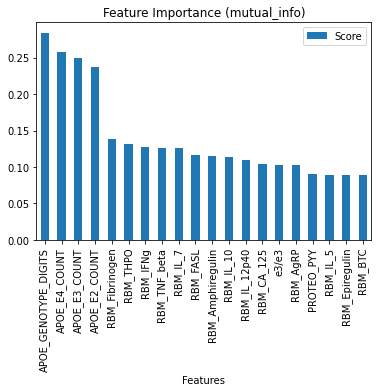

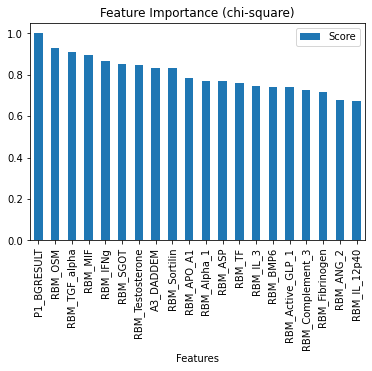

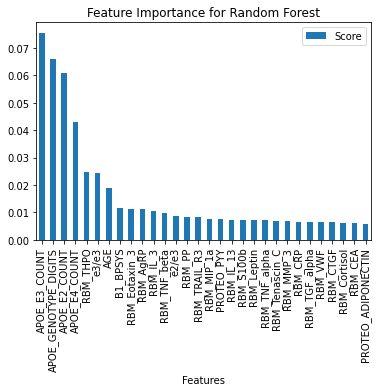

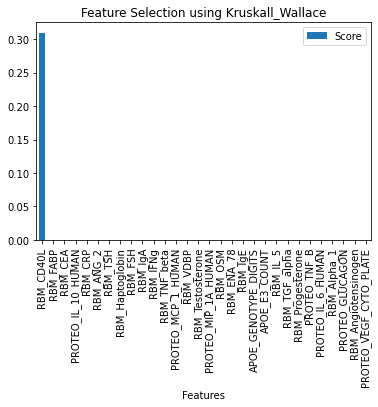

In [98]:
# import preprocessing1 as pp
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
# from sklearn import externals
# import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pyparsing import printables

### Load data
data = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)

df = preprocessing(data)

##### Split features and target variable #####
X = df.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df['P1_PT_TYPE']


def find_features(model, features, score):
    """
    This function lists and plots the top features
    """
    dict = {'Features':features,'Score':score}
    df=pd.DataFrame(dict)
    df=df.sort_values(by='Score', ascending=False)
    df=df[:20]
    df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance ({model})')
    plt.savefig(f'{model}_features.pdf', format="pdf", bbox_inches="tight")
    plot = plt.show()
    return df, plot


def random_forest_select(X,y):
    """
    This function lists and plots random forest feature selection
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    
    #Standard Scaling
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    Xcols=list(X.columns)
    X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
    X_test_std=pd.DataFrame(X_test_std, columns=Xcols)
    
    #Fitting the model
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train_std, y_train.values.ravel())
    
    #RF Score
    rf_score=forest.feature_importances_.tolist()

    #RF Features
    rf_features=list(X.columns)

    rf_dict = {'Features':rf_features,'Score':rf_score}
    rf_df=pd.DataFrame(rf_dict)
    rf_df=rf_df.sort_values(by='Score', ascending=False)
    rf_df=rf_df.head(30)
    rf_df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for Random Forest')
    plt.savefig("RandomForest_features.pdf", format="pdf", bbox_inches="tight")
    rf_plot = plt.show()
    return rf_df, rf_plot


def recursive_selection(rfe, X, y):
    """
    This function lists recursive feature selection
    """
    rfs=rfe.fit(X, y)
    #RFS Features
    rfs_features= list(X.columns)
    #RFS Scores
    rfs_score= rfs.support_.tolist()
    rfs_dict = {'Features':rfs_features,'Score':rfs_score}
    rfs_df= pd.DataFrame.from_dict(rfs_dict)
    rfs_df=rfs_df.loc[rfs_df['Score'] == True]
    return rfs_df


def fb_selection(model, direction_name, direction):
    """
    This function lists and plots forward or backward feature selection 
    """
    ff1 = sfs(model, k_features=30, forward=direction, verbose=2, scoring='accuracy')
    ff1 = ff1.fit(X,y)
    ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
    ff1_df = pd.DataFrame.from_dict(ff1_dict).T
    fig1=plot_sfs(ff1_dict, kind='ci')
    plt.title(f'{direction_name} Feature Selection using {model} (With confidence interval)')
    plt.savefig(f'{model}_features.pdf', format="pdf", bbox_inches="tight")
    plt.grid()
    plot = plt.show()
    ff1_features=list(ff1_df['feature_names'][30])
    return ff1_features, fig1, plot


def kruskal_select(X, y):
    kruskal_features = []
    kruskal_scores = []
    for col in X.columns:
        feature = X[col]

        result = stats.kruskal(list(feature), list(y))
        
        # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
        if result.pvalue > 0:
            kruskal_features.append(col)
            kruskal_scores.append(result.pvalue)
    
    # print(kruskal_features, kruskal_scores)
    kruskal_features= pd.DataFrame(kruskal_features)
    kruskal_scores= pd.DataFrame(kruskal_scores)
    kruskal_df= pd.concat([kruskal_features, kruskal_scores], axis=1)
    kruskal_df.columns = ['Features', 'Score']
    kruskal_df = kruskal_df.sort_values(by='Score', ascending=False)
    kruskal_df.iloc[:30, :]
    kruskal_df.iloc[:30,:].plot.bar(x='Features',y='Score')
    plt.title('Feature Selection using Kruskall_Wallace')
    plt.savefig("Kruskall_features.pdf", format="pdf", bbox_inches="tight")
    kw_plot = plt.show()
    return kruskal_df, kw_plot



##### Combining all methods #####
features=[]
def combine_features():
    features=list(mi_df['Features'])+list(chi_df['Features'])+list(rf_df['Features'])+list(rfr_df['Features'])+list(dtr_df['Features'])+list(kruskal_df['Features'])
    features=pd.DataFrame(features).reset_index(drop=True)
    features.columns = ['Features']
    counts = features['Features'].value_counts().to_frame().reset_index()
    counts.columns=['Features','Frequency']
    combined_features=counts.head(28)
    combined_feature_list=list(counts['Features'])

    return combined_features



###### Mann- Whitney ######
# cant get this to run
#mw=stats.mannwhitneyu(X, y, alternative = 'two-sided')
#Choosing significant features
#lst=np.where(mw.pvalue>0)[0].tolist()
#Mann Whitney Feature Columns
#mw_features=list(df.columns[lst])
#Mann Whitney Column P values
#mw_score=list(mw.pvalue[mw.pvalue>0])
#mw_df, mw_plot = find_features('mann-whitney', mw_features, mw_score)

###### Mutual Info ######

mi= MIC(X,y)
#Mutual Info Features
mi_cols=list(X.columns)
#Mutual Info Scores
mi_score=mi.tolist()
mi_df, mi_plot = find_features('mutual_info', mi_cols,mi_score)

###### Chi-Square ######

df2=df
df2[df2<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99
X1 = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y1 = df2['P1_PT_TYPE']
chi = chi2(X1,y1)
#Chi Test Score
chi_score=chi[1].tolist()
# #Chi Test Features
chi_features=list(X1)
chi_df, chi_plot = find_features('chi-square', chi_features, chi_score)

###### Random Forest ######

rf_df, rf_plot = random_forest_select(X,y)

###### Recursive Selections ######
rfr = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
rfr_df = recursive_selection(rfr, X, y)

dtr = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
dtr_df = recursive_selection(dtr, X, y)

###### Forward and Backward selection ######
# these take so long to run
#dtf_df, dtf_fig, dtf_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Forward', direction = True)
#rff_df, rff_fig, rff_plot =fb_selection(model = RandomForestClassifier(), direction_name = 'Forward', direction = True)

#lrb_df, lrb_fig, lrb_plot = fb_selection(model = LogisticRegression(), direction_name = 'Backward', direction = False)
#dtb_df, dtb_fig, dtb_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Backward', direction = False)

############ Kruskal-Wallis #############

kruskal_df, kw_plot = kruskal_select(X,y)


In [99]:
combined_features = combine_features()
combined_features_list = combined_features['Features'].to_list()

In [100]:
combined_features_list

['APOE_GENOTYPE_DIGITS',
 'APOE_E3_COUNT',
 'APOE_E2_COUNT',
 'RBM_THPO',
 'RBM_IL_3',
 'e3/e3',
 'RBM_PP',
 'RBM_Tenascin_C',
 'PROTEO_PYY',
 'RBM_AgRP',
 'AGE',
 'RBM_Cortisol',
 'APOE_E4_COUNT',
 'RBM_IL_10',
 'RBM_Testosterone',
 'RBM_Eotaxin_3',
 'RBM_Fibrinogen',
 'RBM_BMP6',
 'RBM_IFNg',
 'RBM_ASP',
 'RBM_Alpha_1',
 'RBM_MIP_1a',
 'RBM_IL_13',
 'RBM_S100b',
 'RBM_SGOT',
 'RBM_IL_12p40',
 'RBM_MCP_1',
 'RBM_TGF_alpha']

In [101]:
final_features_df = df[combined_features_list]

In [102]:
final_features_df

,APOE_GENOTYPE_DIGITS,APOE_E3_COUNT,APOE_E2_COUNT,RBM_THPO,RBM_IL_3,e3/e3,RBM_PP,RBM_Tenascin_C,PROTEO_PYY,RBM_AgRP,...,RBM_IFNg,RBM_ASP,RBM_Alpha_1,RBM_MIP_1a,RBM_IL_13,RBM_S100b,RBM_SGOT,RBM_IL_12p40,RBM_MCP_1,RBM_TGF_alpha
1,34.0,1.0,0.0,2.5,0.0760,0,1150.0,2890.0,100.52,143.0,...,1.15,0.14,2.10,32.0,62.0,0.55,14.0,0.065,93.0,0.155
8,34.0,1.0,0.0,3.0,0.0135,0,405.0,545.0,222.89,289.0,...,1.15,0.24,1.70,16.0,49.0,0.32,11.0,0.065,234.0,11.000
16,33.0,2.0,0.0,2.3,0.0135,1,1360.0,799.0,85.94,112.0,...,1.15,0.18,1.60,32.0,42.0,0.27,13.0,0.065,156.0,0.155
27,99.0,99.0,99.0,6.6,0.1400,0,493.0,997.0,177.42,67.0,...,2.30,99.00,1.90,62.0,53.0,0.70,16.0,0.480,729.0,59.000
31,99.0,99.0,99.0,12.0,0.0840,0,576.0,1150.0,236.94,15.0,...,4.60,99.00,1.80,78.0,79.0,0.06,12.0,0.430,238.0,87.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,33.0,2.0,0.0,5.1,0.0780,1,276.0,498.0,178.68,101.0,...,3.80,99.00,1.50,117.0,67.0,0.41,27.0,0.280,964.0,36.000
10277,33.0,2.0,0.0,5.9,0.1200,1,71.0,871.0,97.78,46.0,...,3.30,99.00,1.50,57.0,87.0,0.33,13.0,0.140,201.0,37.000
10285,23.0,1.0,1.0,6.2,0.0780,0,34.0,467.0,93.77,46.0,...,3.20,99.00,0.52,121.0,85.0,0.70,23.0,0.490,517.0,70.000
12002,33.0,2.0,0.0,4.2,0.6900,1,239.0,1110.0,139.92,123.0,...,1.80,99.00,2.10,98.0,212.0,0.41,13.0,0.790,473.0,53.000


In [103]:
# merge the dataset for machine learning model
frames = [final_features_df, y]

final_df = pd.concat(frames, axis=1)

In [104]:
final_df

,APOE_GENOTYPE_DIGITS,APOE_E3_COUNT,APOE_E2_COUNT,RBM_THPO,RBM_IL_3,e3/e3,RBM_PP,RBM_Tenascin_C,PROTEO_PYY,RBM_AgRP,...,RBM_ASP,RBM_Alpha_1,RBM_MIP_1a,RBM_IL_13,RBM_S100b,RBM_SGOT,RBM_IL_12p40,RBM_MCP_1,RBM_TGF_alpha,P1_PT_TYPE
1,34.0,1.0,0.0,2.5,0.0760,0,1150.0,2890.0,100.52,143.0,...,0.14,2.10,32.0,62.0,0.55,14.0,0.065,93.0,0.155,1
8,34.0,1.0,0.0,3.0,0.0135,0,405.0,545.0,222.89,289.0,...,0.24,1.70,16.0,49.0,0.32,11.0,0.065,234.0,11.000,1
16,33.0,2.0,0.0,2.3,0.0135,1,1360.0,799.0,85.94,112.0,...,0.18,1.60,32.0,42.0,0.27,13.0,0.065,156.0,0.155,1
27,99.0,99.0,99.0,6.6,0.1400,0,493.0,997.0,177.42,67.0,...,99.00,1.90,62.0,53.0,0.70,16.0,0.480,729.0,59.000,1
31,99.0,99.0,99.0,12.0,0.0840,0,576.0,1150.0,236.94,15.0,...,99.00,1.80,78.0,79.0,0.06,12.0,0.430,238.0,87.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,33.0,2.0,0.0,5.1,0.0780,1,276.0,498.0,178.68,101.0,...,99.00,1.50,117.0,67.0,0.41,27.0,0.280,964.0,36.000,2
10277,33.0,2.0,0.0,5.9,0.1200,1,71.0,871.0,97.78,46.0,...,99.00,1.50,57.0,87.0,0.33,13.0,0.140,201.0,37.000,2
10285,23.0,1.0,1.0,6.2,0.0780,0,34.0,467.0,93.77,46.0,...,99.00,0.52,121.0,85.0,0.70,23.0,0.490,517.0,70.000,2
12002,33.0,2.0,0.0,4.2,0.6900,1,239.0,1110.0,139.92,123.0,...,99.00,2.10,98.0,212.0,0.41,13.0,0.790,473.0,53.000,2


## Modeling and Evaluation

In [15]:
def ml_prep(final_df):
  
  features = final_df.loc[:, final_df.columns != 'P1_PT_TYPE']
  y = final_df['P1_PT_TYPE']

  # standard scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(features)

  # train_test_split (80/20)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  return X_train, X_test, y_train, y_test


In [67]:
def results(df, X_train, X_test, y_train, y_test, classifier_func, model_name):

    # perform evaluation on various models

    for model in range(len(classifier_func[:])):
      classifier_func[model].fit(X_train, y_train)

      print('-'*150)
      print(f'Evaluation for {model_name[model]}: ')
      y_pred = classifier_func[model].predict(X_test)
      evaluation(y_test, y_pred)
      print('-'*150)
      print()
        
    

In [66]:
# Evaluation metrics
def evaluation(y_test, y_pred):

    # Accuracy classification score
    score = round(accuracy_score(y_test, y_pred), 4)
    print(f'Accuracy Score: {score*100}%')
    print()
    
    # Macro averaged precision: calculate precision for all classes individually and then average them
    macro_averaged_precision = precision_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged Precision score: {:.4f}".format(macro_averaged_precision))

    # Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
    micro_averaged_precision = precision_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged Precision score: {:.4f}".format(micro_averaged_precision))

    # Macro averaged recall: calculate recall for all classes individually and then average them
    macro_averaged_recall = recall_score(y_test, y_pred, average = 'macro')
    print("Macro-averaged recall score: {:.4f}".format(macro_averaged_recall))
    
    # Micro averaged recall: calculate class wise true positive and false negative and then use that to calculate overall recall
    micro_averaged_recall = recall_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged recall score: {:.4f}".format(micro_averaged_recall))

    # Macro averaged F1 Score: calculate f1 score of every class and then average them
    macro_averaged_f1 = f1_score(y_test, y_pred, average = 'macro')
    print("Macro-Averaged F1 score: {:.4f}".format(macro_averaged_f1))

    # Micro averaged F1 Score: calculate macro-averaged precision score and macro-averaged recall score and then take there harmonic mean
    micro_averaged_f1 = f1_score(y_test, y_pred, average = 'micro')
    print("Micro-Averaged F1 score: {:.4f}".format(micro_averaged_f1))

    f_beta = fbeta_score(y_test, y_pred, average='macro', beta=2)
    print("F-Beta score: {:.4f}".format(f_beta))

    # Receiver Operating Characteristic Area Under Curve (ROC_AUC) Score
    roc_auc_bi = roc_auc_score(y_test, y_pred, average = 'macro')
    print("ROC_AUC Score: {:.4f}".format(roc_auc_bi))

    # required to convert labels for auc_precision_recall
    # converted from 1 = AD and 2 = Control to 0 = AD and 1 = Control
    # convert y_test
    prc_y_test = copy.deepcopy(y_test)
    prc_y_test[prc_y_test==1] = 0
    prc_y_test[prc_y_test==2] = 1

    # convert y_pred
    prc_y_pred = copy.deepcopy(y_pred)
    prc_y_pred[prc_y_pred==1] = 0
    prc_y_pred[prc_y_pred==2] = 1

    # Compute Area Under the Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(prc_y_test, prc_y_pred)
    auc_precision_recall = auc(recall, precision)
    print("AUPRC is: {:.4f}".format(auc_precision_recall))

    # Get specificity from classification report
    class_report = classification_report(y_test, y_pred, labels=[1,2])
    print("Classification Report: ")
    print(class_report)

    # plot the confusion matrix
    plt.figure(figsize = (18,8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Note: Use micro-average if classes are imbalance

In [148]:
def main(non_genetic_df):

  # pre-process the raw data
  df = preprocessing(non_genetic_df)

  # target variable
  y = df['P1_PT_TYPE']
  
  # getting top features after feature selection
  combined_features = combine_features()
  combined_features_list = combined_features['Features'].to_list()
  final_features_df = df[combined_features_list]

  # merge the dataset for machine learning model
  frames = [final_features_df, y]
  final_df = pd.concat(frames, axis=1)

  # perform train_test_split
  X_train, X_test, y_train, y_test = ml_prep(final_df)

  # list of classifier functions
  classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42),       
                    XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                     
                    GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                    DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                    LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)] 

  # list of classifier names
  model_name= ['Light Gradient Boosting Method', 
               'Random Forest', 
               'eXtreme Gradient Boosting', 
               'Gradient Boosting', 
               'Decision Tree', 
               'Logistic Regression', 
               'Extra Trees',
               'Categorical Boosting']

  # evaluate performance and feature importance for each algorithm
  results(final_df, X_train, X_test, y_train, y_test, classifier_func, model_name)

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Light Gradient Boosting Method: 
Accuracy Score: 88.24%

Macro-Averaged Precision score: 0.8800
Micro-Averaged Precision score: 0.8824
Macro-averaged recall score: 0.8873
Micro-Averaged recall score: 0.8824
Macro-Averaged F1 score: 0.8813
Micro-Averaged F1 score: 0.8824
F-Beta score: 0.8843
ROC_AUC Score: 0.8873
AUPRC is: 0.9362
Classification Report: 
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        51
           2       0.94      0.85      0.89        68

    accuracy                           0.88       119
   macro avg       0.88      0.89      0.88       119
weighted avg       0.89      0.88      0.88       119



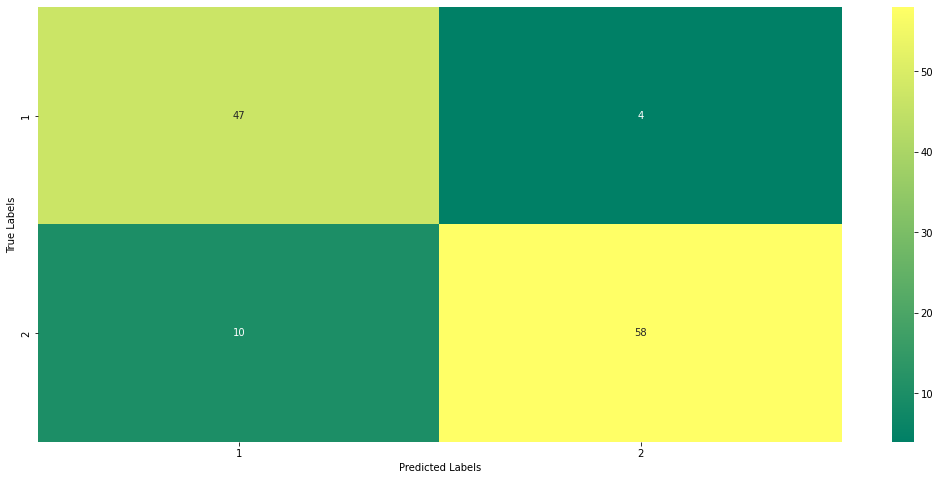

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 88.24%

Macro-Averaged Precision score: 0.8791
Micro-Averaged Precision score: 0.8824
Macro-averaged recall score: 0.8824
Micro-Averaged recall score: 0.8824
Macro-Averaged F1 score: 0.8805
Micro-Averaged F1 score: 0.8824
F-Beta score: 0.8815
ROC_AUC Score: 0.8824
AUPRC is: 0.9293
Classification Report: 
              precision    recall  f1-score   support

           1       0.85      0.88      0.87        51
           2       0.91      0.88      0.90        68

    accuracy                           0.88       119
   macro avg       0.88      0.88      0.88       119
weighted avg       0.88      0.88      0.88       119



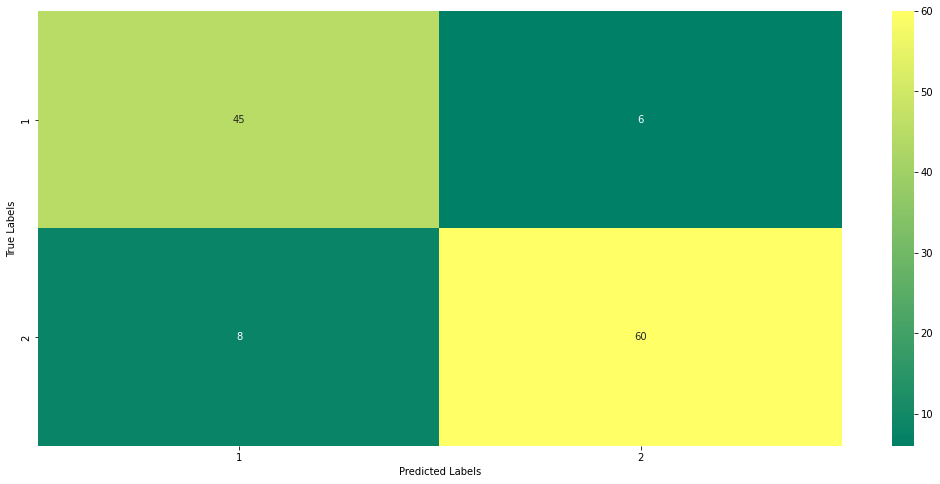

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 87.39%

Macro-Averaged Precision score: 0.8724
Micro-Averaged Precision score: 0.8739
Macro-averaged recall score: 0.8799
Micro-Averaged recall score: 0.8739
Macro-Averaged F1 score: 0.8731
Micro-Averaged F1 score: 0.8739
F-Beta score: 0.8764
ROC_AUC Score: 0.8799
AUPRC is: 0.9325
Classification Report: 
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        51
           2       0.93      0.84      0.88        68

    accuracy                           0.87       119
   macro avg       0.87      0.88      0.87       119
weighted avg       0.88      0.87      0.87       119



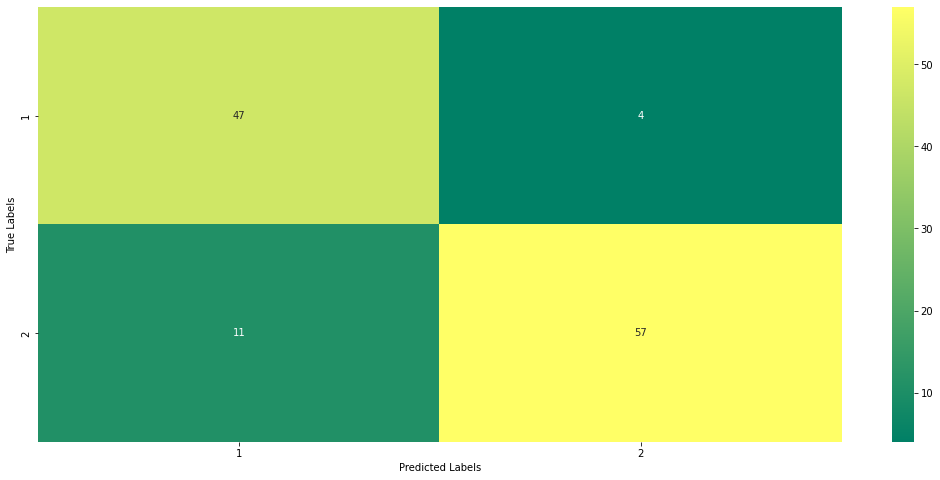

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 87.39%

Macro-Averaged Precision score: 0.8705
Micro-Averaged Precision score: 0.8739
Macro-averaged recall score: 0.8750
Micro-Averaged recall score: 0.8739
Macro-Averaged F1 score: 0.8722
Micro-Averaged F1 score: 0.8739
F-Beta score: 0.8737
ROC_AUC Score: 0.8750
AUPRC is: 0.9255
Classification Report: 
              precision    recall  f1-score   support

           1       0.83      0.88      0.86        51
           2       0.91      0.87      0.89        68

    accuracy                           0.87       119
   macro avg       0.87      0.88      0.87       119
weighted avg       0.88      0.87      0.87       119



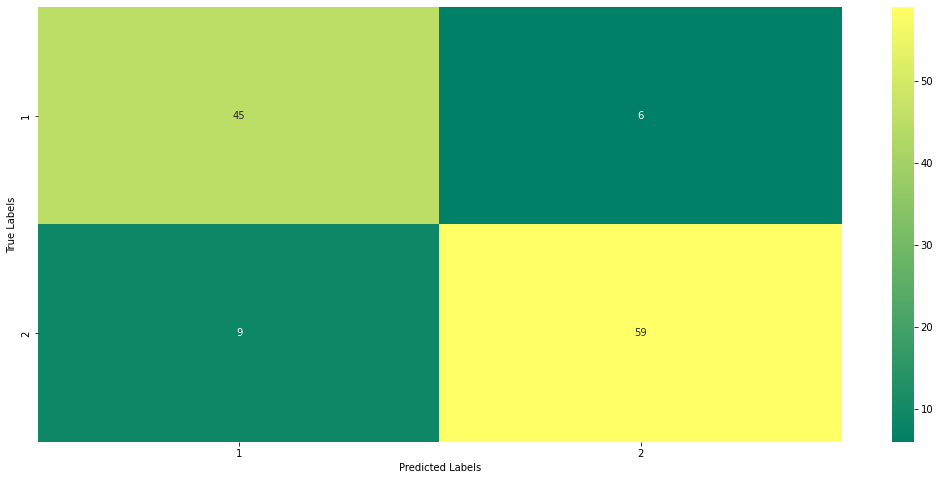

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 81.51%

Macro-Averaged Precision score: 0.8113
Micro-Averaged Precision score: 0.8151
Macro-averaged recall score: 0.8113
Micro-Averaged recall score: 0.8151
Macro-Averaged F1 score: 0.8113
Micro-Averaged F1 score: 0.8151
F-Beta score: 0.8113
ROC_AUC Score: 0.8113
AUPRC is: 0.8845
Classification Report: 
              precision    recall  f1-score   support

           1       0.78      0.78      0.78        51
           2       0.84      0.84      0.84        68

    accuracy                           0.82       119
   macro avg       0.81      0.81      0.81       119
weighted avg       0.82      0.82      0.82       119



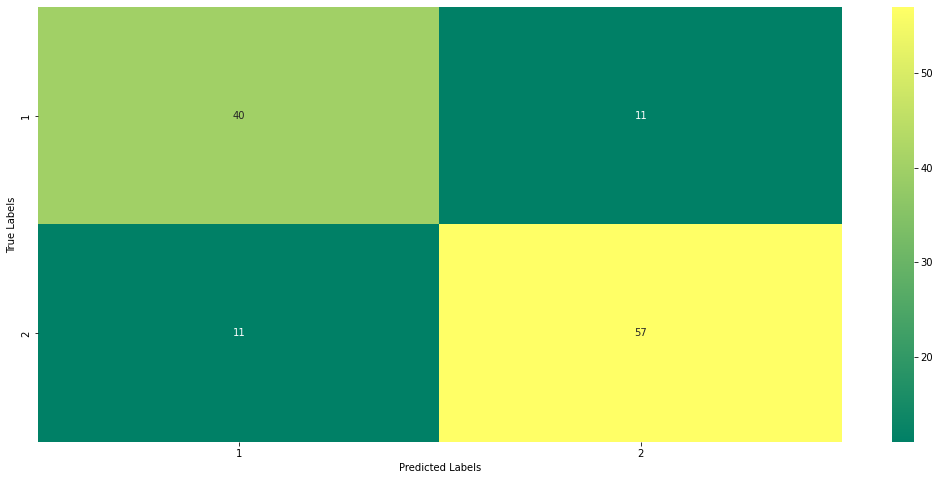

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 86.55000000000001%

Macro-Averaged Precision score: 0.8627
Micro-Averaged Precision score: 0.8655
Macro-averaged recall score: 0.8627
Micro-Averaged recall score: 0.8655
Macro-Averaged F1 score: 0.8627
Micro-Averaged F1 score: 0.8655
F-Beta score: 0.8627
ROC_AUC Score: 0.8627
AUPRC is: 0.9160
Classification Report: 
              precision    recall  f1-score   support

           1       0.84      0.84      0.84        51
           2       0.88      0.88      0.88        68

    accuracy                           0.87       119
   macro avg       0.86      0.86      0.86       119
weighted avg       0.87      0.87      0.87       119


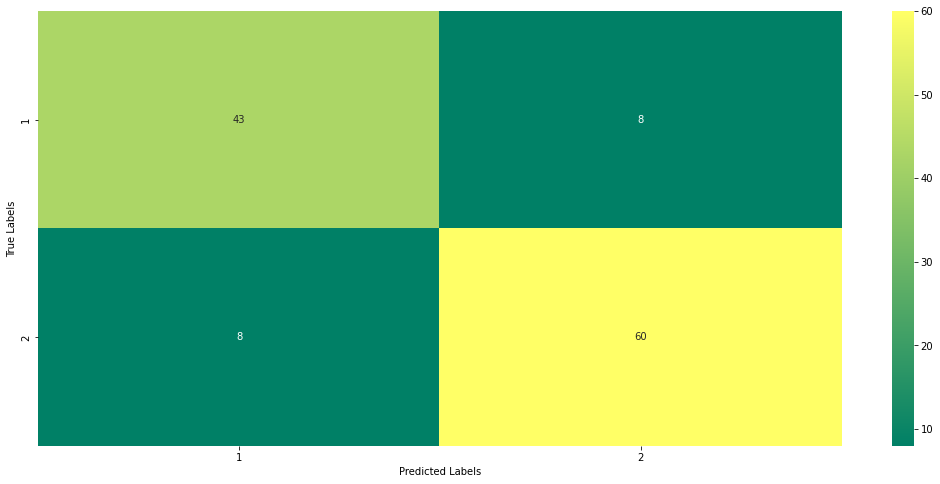

------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 84.03%

Macro-Averaged Precision score: 0.8794
Micro-Averaged Precision score: 0.8403
Macro-averaged recall score: 0.8162
Micro-Averaged recall score: 0.8403
Macro-Averaged F1 score: 0.8261
Micro-Averaged F1 score: 0.8403
F-Beta score: 0.8158
ROC_AUC Score: 0.8162
AUPRC is: 0.8910
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.65      0.78        51
           2       0.79      0.99      0.88        68

    accuracy                           0.84       119
   macro avg       0.88      0.82      0.83       119
weighted avg       0.87      0.84      0.83       119



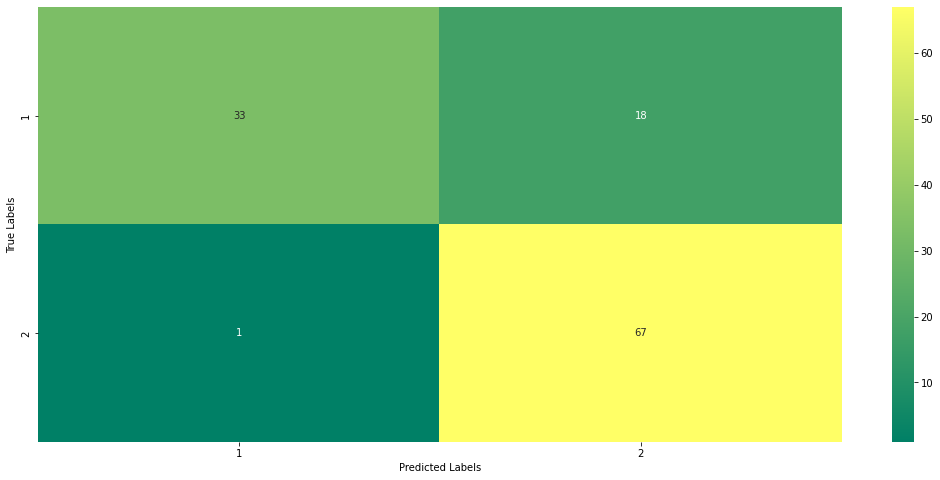

------------------------------------------------------------------------------------------------------------------------------------------------------

Learning rate set to 0.00749
0:	learn: 0.6853865	total: 3.96ms	remaining: 3.96s
1:	learn: 0.6793111	total: 7.8ms	remaining: 3.89s
2:	learn: 0.6730703	total: 11.8ms	remaining: 3.91s
3:	learn: 0.6668098	total: 15.5ms	remaining: 3.87s
4:	learn: 0.6604943	total: 19.3ms	remaining: 3.83s
5:	learn: 0.6546603	total: 23ms	remaining: 3.8s
6:	learn: 0.6492555	total: 26.7ms	remaining: 3.79s
7:	learn: 0.6426203	total: 30.4ms	remaining: 3.77s
8:	learn: 0.6372101	total: 34.1ms	remaining: 3.75s
9:	learn: 0.6306711	total: 37.8ms	remaining: 3.74s
10:	learn: 0.6252413	total: 41.5ms	remaining: 3.73s
11:	learn: 0.6189773	total: 45.4ms	remaining: 3.73s
12:	learn: 0.6120831	total: 51.5ms	remaining: 3.91s
13:	learn: 0.6063017	total: 55.1ms	remaining: 3.88s
14:	learn: 0.6004923	total: 58.9ms	remaining: 3.87s
15:	learn: 0.5942378	total: 62.6ms	remaining: 3.85s
1

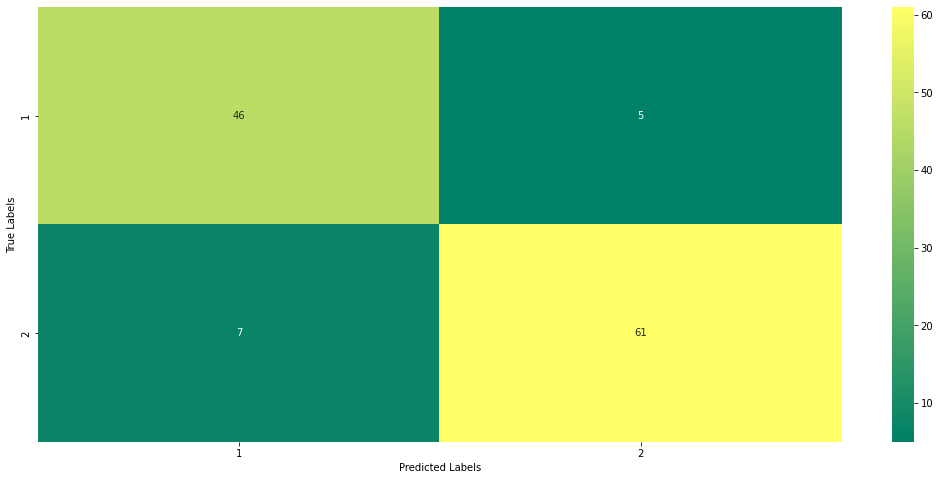

------------------------------------------------------------------------------------------------------------------------------------------------------



In [149]:
non_genetic_df = pd.read_csv("/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/20220916 updated TARCC Data for Dr Broussard.csv", low_memory=False)
main(non_genetic_df)

## Finetuning

In [150]:
df = preprocessing(non_genetic_df)

# getting top features after feature selection
combined_features = combine_features()
combined_features_list = combined_features['Features'].to_list()

X = df[combined_features_list]
y = df['P1_PT_TYPE']

# merge the dataset for machine learning model
frames = [X, y]
final_df = pd.concat(frames, axis=1)

X_train, X_test, y_train, y_test = ml_prep(final_df)


Learning rate set to 0.00749
0:	learn: 0.6853865	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6793111	total: 23.9ms	remaining: 11.9s
2:	learn: 0.6730703	total: 43.4ms	remaining: 14.4s
3:	learn: 0.6668098	total: 54.4ms	remaining: 13.5s
4:	learn: 0.6604943	total: 70.6ms	remaining: 14s
5:	learn: 0.6546603	total: 80.9ms	remaining: 13.4s
6:	learn: 0.6492555	total: 89.8ms	remaining: 12.7s
7:	learn: 0.6426203	total: 97.6ms	remaining: 12.1s
8:	learn: 0.6372101	total: 110ms	remaining: 12.2s
9:	learn: 0.6306711	total: 130ms	remaining: 12.9s
10:	learn: 0.6252413	total: 141ms	remaining: 12.7s
11:	learn: 0.6189773	total: 152ms	remaining: 12.5s
12:	learn: 0.6120831	total: 161ms	remaining: 12.2s
13:	learn: 0.6063017	total: 173ms	remaining: 12.2s
14:	learn: 0.6004923	total: 185ms	remaining: 12.1s
15:	learn: 0.5942378	total: 199ms	remaining: 12.2s
16:	learn: 0.5880046	total: 209ms	remaining: 12.1s
17:	learn: 0.5826597	total: 216ms	remaining: 11.8s
18:	learn: 0.5775502	total: 224ms	remaining: 11.6s
19:	le

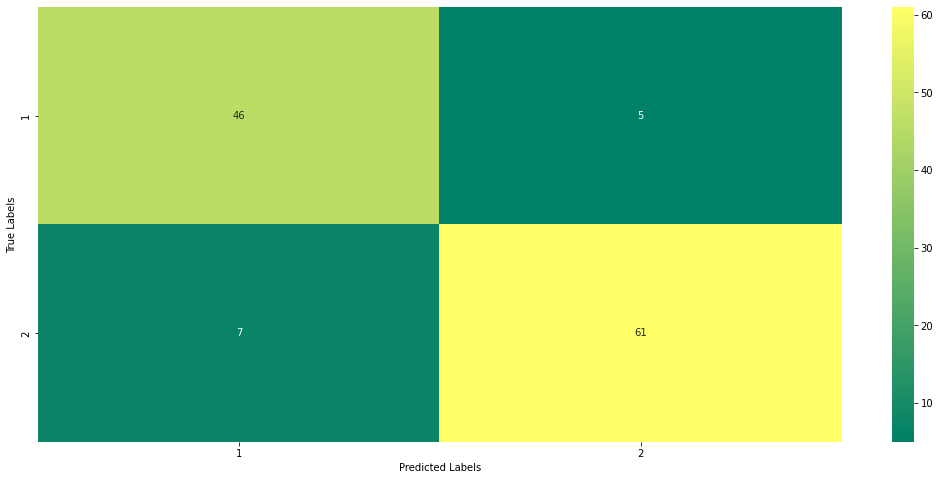

In [161]:
import pickle
clf = CatBoostClassifier(random_state=42)
#Fitting model with training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
evaluation(y_test, y_pred)
# pickle.dump(clf, open('CatBoost_model.pkl','wb'))


In [155]:
CatBoost_model = pickle.load(open('/content/drive/MyDrive/Capstone COMP 549/TARCC_F22-main/CatBoost_model.pkl','rb'))

In [156]:
CatBoost_model

In [109]:
# hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)


In [110]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 1000, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.885 params {'n_estimators': 675, 'max_depth': 3}
Gini 0.889 params {'n_estimators': 800, 'max_depth': 4}
Gini 0.896 params {'n_estimators': 675, 'max_depth': 5}
Gini 0.903 params {'n_estimators': 450, 'max_depth': 8}
Gini 0.894 params {'n_estimators': 400, 'max_depth': 5}
Gini 0.897 params {'n_estimators': 325, 'max_depth': 5}
Gini 0.903 params {'n_estimators': 400, 'max_depth': 8}
Gini 0.897 params {'n_estimators': 575, 'max_depth': 6}
Gini 0.879 params {'n_estimators': 850, 'max_depth': 2}
Gini 0.890 params {'n_estimators': 75, 'max_depth': 5}
100%|██████████| 10/10 [00:49<00:00,  4.98s/it, best loss: 0.8792048111998423]
Hyperopt estimated optimum {'max_depth': 2.0, 'n_estimators': 850.0}


In [111]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))


Gini 0.898 params {'max_depth': 5, 'gamma': '0.024', 'colsample_bytree': '0.554'}
Gini 0.902 params {'max_depth': 5, 'gamma': '0.305', 'colsample_bytree': '0.804'}
Gini 0.888 params {'max_depth': 2, 'gamma': '0.061', 'colsample_bytree': '0.356'}
Gini 0.902 params {'max_depth': 7, 'gamma': '0.031', 'colsample_bytree': '0.383'}
Gini 0.896 params {'max_depth': 7, 'gamma': '0.018', 'colsample_bytree': '0.940'}
Gini 0.902 params {'max_depth': 5, 'gamma': '0.498', 'colsample_bytree': '0.366'}
Gini 0.904 params {'max_depth': 4, 'gamma': '0.010', 'colsample_bytree': '0.777'}
Gini 0.900 params {'max_depth': 6, 'gamma': '0.054', 'colsample_bytree': '0.961'}
Gini 0.897 params {'max_depth': 5, 'gamma': '0.067', 'colsample_bytree': '0.829'}
Gini 0.907 params {'max_depth': 4, 'gamma': '0.388', 'colsample_bytree': '0.746'}
100%|██████████| 10/10 [00:16<00:00,  1.69s/it, best loss: 0.8880683032633341]
Hyperopt estimated optimum {'colsample_bytree': 0.3558587726600995, 'gamma': 0.060626046085545005, 'm

In [112]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold(), n_jobs=-1).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))


Gini 0.902 params {'num_leaves': 52, 'colsample_bytree': '0.553'}
Gini 0.895 params {'num_leaves': 24, 'colsample_bytree': '0.919'}
Gini 0.896 params {'num_leaves': 126, 'colsample_bytree': '0.406'}
Gini 0.895 params {'num_leaves': 48, 'colsample_bytree': '0.993'}
Gini 0.896 params {'num_leaves': 62, 'colsample_bytree': '0.346'}
Gini 0.899 params {'num_leaves': 50, 'colsample_bytree': '0.578'}
Gini 0.896 params {'num_leaves': 10, 'colsample_bytree': '0.419'}
Gini 0.899 params {'num_leaves': 82, 'colsample_bytree': '0.446'}
Gini 0.896 params {'num_leaves': 124, 'colsample_bytree': '0.655'}
Gini 0.895 params {'num_leaves': 78, 'colsample_bytree': '0.986'}
100%|██████████| 10/10 [00:59<00:00,  5.95s/it, best loss: 0.8946344079660851]
Hyperopt estimated optimum {'colsample_bytree': 0.9925949442538964, 'num_leaves': 48.0}


In [113]:
from hyperopt import hp, fmin, tpe, Trials
lgb_class_params = {
    'learning_rate':    hp.uniform('learning_rate',0.1,1),
    'max_depth':        hp.choice('max_depth', np.arange(2, 100, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 50, 1, dtype=int)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.3,1),
    'subsample':        hp.uniform('subsample', 0.6, 1),
    'num_leaves':       hp.choice('num_leaves', np.arange(8, 200, 2, dtype=int)),
    'min_split_gain':   hp.uniform('min_split_gain', 0, 1),
    'reg_alpha':        hp.uniform('reg_alpha',0,1),
    'reg_lambda':       hp.uniform('reg_lambda',0,1),
    'n_estimators':     5
}
def objective(params):
  lgbm_clf = lgbm.LGBMClassifier(n_jobs=-1,early_stopping_rounds=None,**params)
  score = cross_val_score(lgbm_clf, X_train, y_train, cv=StratifiedKFold(),n_jobs=-1).mean() #scoring=gini_scorer
  print("Gini {:.3f} params {}".format(score, params))
  return score

trials = Trials()
best_result = fmin(
    fn=objective,                          
    space=lgb_class_params,   
    algo=tpe.suggest,              
    max_evals=50,                  
    trials=trials                   
)

print("Hyperopt estimated optimum {}".format(best_result))

Gini 0.852 params {'colsample_bytree': 0.6462266999187298, 'learning_rate': 0.6786263108321496, 'max_depth': 37, 'min_child_weight': 16, 'min_split_gain': 0.6676250339850923, 'n_estimators': 5, 'num_leaves': 128, 'reg_alpha': 0.06102111731951554, 'reg_lambda': 0.4167903531107636, 'subsample': 0.9948081530351152}
Gini 0.692 params {'colsample_bytree': 0.32287873027959885, 'learning_rate': 0.8964757038145025, 'max_depth': 73, 'min_child_weight': 39, 'min_split_gain': 0.542301613267897, 'n_estimators': 5, 'num_leaves': 196, 'reg_alpha': 0.6417912512169578, 'reg_lambda': 0.07777366865882518, 'subsample': 0.9171603695611531}
Gini 0.660 params {'colsample_bytree': 0.4169725405855687, 'learning_rate': 0.9166040987090568, 'max_depth': 46, 'min_child_weight': 41, 'min_split_gain': 0.03340821732660848, 'n_estimators': 5, 'num_leaves': 116, 'reg_alpha': 0.2925816389139463, 'reg_lambda': 0.2646623261382005, 'subsample': 0.654644197962326}
Gini 0.519 params {'colsample_bytree': 0.9947521420250631, 

In [ ]:
# (colsample_bytree=0.9947521420250631, learning_rate= 0.7799587437319592, max_depth= 86, 
# min_child_weight= 48, min_split_gain= 0.9542186048868133, num_leaves=91, 
# reg_alpha= 0.7939150627161357, reg_lambda= 0.6828715692933739, subsample= 0.6378874482425733)

GridSearchCV

In [125]:
# Random forest
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [126]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [200, 500]})

In [127]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:

# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': list(range(100,2000,200)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': list(range(1,5,1)),
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

In [ ]:
# XGBoost
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

In [ ]:
# Extra Tree
# n_jobs=-1 to allow run it on all cores
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

In [124]:
params = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=params, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=200, random_state=42,
                   solver='sag')


In [123]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10, verbose=1, n_jobs=-1)
DT_grid.fit(X_train, y_train)
print(DT_grid.best_estimator_)


Fitting 10 folds for each of 90 candidates, totalling 900 fits
DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2',
                       random_state=42)


In [159]:
# catboost
params = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

#Instantiate GridSearchCV
cat_grid = GridSearchCV (estimator = CatBoostClassifier(random_state=42), param_grid = params, scoring ='accuracy', cv = 5)

#fit the model
cat_grid.fit(X_train, y_train)

#returns the estimator with the best performance
print(cat_grid.best_estimator_)

#returns the best score
print(cat_grid.best_score_)

#returns the best parameters
print(cat_grid.best_params_)

Streaming output truncated to the last 5000 lines.
108:	learn: 0.3498246	total: 311ms	remaining: 2.54s
109:	learn: 0.3482482	total: 314ms	remaining: 2.54s
110:	learn: 0.3469506	total: 316ms	remaining: 2.53s
111:	learn: 0.3454468	total: 319ms	remaining: 2.53s
112:	learn: 0.3445653	total: 321ms	remaining: 2.52s
113:	learn: 0.3425531	total: 324ms	remaining: 2.51s
114:	learn: 0.3408239	total: 326ms	remaining: 2.51s
115:	learn: 0.3395734	total: 328ms	remaining: 2.5s
116:	learn: 0.3382595	total: 331ms	remaining: 2.5s
117:	learn: 0.3369865	total: 334ms	remaining: 2.49s
118:	learn: 0.3359164	total: 336ms	remaining: 2.49s
119:	learn: 0.3348530	total: 339ms	remaining: 2.48s
120:	learn: 0.3339333	total: 341ms	remaining: 2.48s
121:	learn: 0.3322137	total: 344ms	remaining: 2.47s
122:	learn: 0.3311157	total: 346ms	remaining: 2.47s
123:	learn: 0.3303340	total: 349ms	remaining: 2.46s
124:	learn: 0.3291116	total: 351ms	remaining: 2.46s
125:	learn: 0.3280759	total: 354ms	remaining: 2.46s
126:	learn: 0.3

In [ ]:
# optimal models
# lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136, num_leaves= 122), 
#RandomForestClassifier(criterion= 'gini', max_depth=6, max_features='auto', n_estimators= 500), 
# XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8)

## SHAP


In [77]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [128]:
X.columns

Index(['APOE_GENOTYPE_DIGITS', 'APOE_E3_COUNT', 'APOE_E2_COUNT', 'RBM_THPO',
       'RBM_IL_3', 'e3/e3', 'RBM_PP', 'RBM_Tenascin_C', 'PROTEO_PYY',
       'RBM_AgRP', 'AGE', 'RBM_Cortisol', 'APOE_E4_COUNT', 'RBM_IL_10',
       'RBM_Testosterone', 'RBM_Eotaxin_3', 'RBM_Fibrinogen', 'RBM_BMP6',
       'RBM_IFNg', 'RBM_ASP', 'RBM_Alpha_1', 'RBM_MIP_1a', 'RBM_IL_13',
       'RBM_S100b', 'RBM_SGOT', 'RBM_IL_12p40', 'RBM_MCP_1', 'RBM_TGF_alpha'],
      dtype='object')

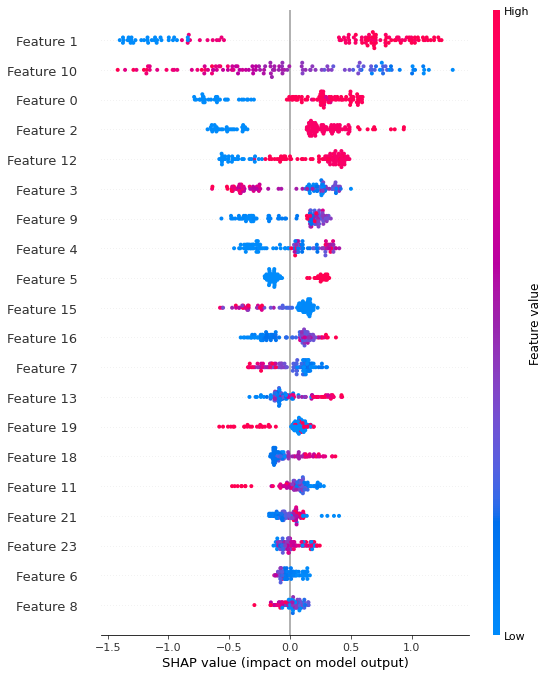

In [157]:
# using pickled model - CatBoost_model
explainer = shap.TreeExplainer(CatBoost_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [158]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

In [ ]:
# use Kernel SHAP to explain test set predictions
k_explainer = shap.KernelExplainer(CatBoost_model.predict_proba, X_train)
k_shap_values = k_explainer.shap_values(X)
shap.force_plot(k_explainer.expected_value, k_shap_values, X)

In [ ]:
shap.dependence_plot(3, shap_values, X_test, interaction_index='P1_PT_TYPE')
